In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('Discriminant-analysis-churn-dataset.csv')
data.dropna()
data.head()

,account_length,number_vmail_messages,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,number_customer_service_calls,churn
0,128,25,45.07,16.78,11.01,2.70,1,0
1,107,26,27.47,16.62,11.45,3.70,1,0
2,137,0,41.38,10.30,7.32,3.29,0,0
3,84,0,50.90,5.26,8.86,1.78,2,0
4,75,0,28.34,12.61,8.41,2.73,3,0


In [3]:
no_class = data['churn'].value_counts()
no_classes = len(no_class)
no_classes

2

In [4]:
column_names = data.columns.values
column_names

array(['account_length', 'number_vmail_messages', 'total_day_charge',
       'total_eve_charge', 'total_night_charge', 'total_intl_charge',
       'number_customer_service_calls', 'churn'], dtype=object)

In [6]:
def readInput(col):
    print('Features are : \n' + '\n'.join(col))
    text = input(
        "Enter features with comma seperator: ")
    dep = input(
        "Enter Dependent Variable : ")
    arr = text.split(",")
    return arr,dep

features,dep = readInput(column_names)

## account_length,number_vmail_messages,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,number_customer_service_calls

Features are : 
account_length
number_vmail_messages
total_day_charge
total_eve_charge
total_night_charge
total_intl_charge
number_customer_service_calls
churn
Enter features with comma seperator: account_length,number_vmail_messages,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,number_customer_service_calls
Enter Dependent Variable : churn


In [7]:
y = data[dep].values
X = data[features].values

### Find Mean Vectors


In [8]:
cols = len(X[0])
rows = len(X)

In [9]:
mean_vectors = []
for cl in range(0,no_classes):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl]))

Mean Vector class 0: [99.91707431  8.29187049 29.87749359 16.89865362  8.97559283  2.75205451
  1.45772187]

Mean Vector class 1: [102.33239038   4.49646393  35.33841584  17.99956153   9.27360679
   2.88742574   2.25459689]



### Scatter Matrix within 

In [10]:
S_W = np.zeros((cols,cols))
for cl,mv in zip(range(1,cols), mean_vectors):
    class_sc_mat = np.zeros((cols,cols))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(cols,1), mv.reshape(cols,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[ 1.09992335e+06  9.40718671e+03  1.69383086e+04  1.56125472e+03
  -3.00928047e+03 -7.40361275e+02  6.54936191e+02]
 [ 9.40718671e+03  1.00297155e+05 -3.31651930e+04 -6.58110000e+03
  -2.70698248e+03 -1.35965169e+02 -6.55660020e+02]
 [ 1.69383086e+04 -3.31651930e+04  1.17038861e+05  1.23221818e+04
   3.44383032e+03  3.71790532e+02 -2.81365239e+03]
 [ 1.56125472e+03 -6.58110000e+03  1.23221818e+04  1.44214421e+04
   2.87370670e+02  2.78700049e+01 -5.72699870e+02]
 [-3.00928047e+03 -2.70698248e+03  3.44383032e+03  2.87370670e+02
   3.59226781e+03 -1.91946751e+01 -1.03620946e+02]
 [-7.40361275e+02 -1.35965169e+02  3.71790532e+02  2.78700049e+01
  -1.91946751e+01  4.14388752e+02 -3.22197474e+01]
 [ 6.54936191e+02 -6.55660020e+02 -2.81365239e+03 -5.72699870e+02
  -1.03620946e+02 -3.22197474e+01  2.77712448e+03]]


### Scatter Matrix Between

In [11]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((cols,cols))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(cols,1) # make column vector
    overall_mean = overall_mean.reshape(cols,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 8.24643379e+01 -1.29583739e+02  1.86448201e+02  3.75874787e+01
   1.01748688e+01  4.62187926e+00  2.72071102e+01]
 [-1.29583739e+02  2.03626754e+02 -2.92983072e+02 -5.90646352e+01
  -1.59886999e+01 -7.26278065e+00 -4.27530149e+01]
 [ 1.86448201e+02 -2.92983072e+02  4.21551092e+02  8.49836180e+01
   2.30049259e+01  1.04498635e+01  6.15140663e+01]
 [ 3.75874787e+01 -5.90646352e+01  8.49836180e+01  1.71324792e+01
   4.63773401e+00  2.10666565e+00  1.24010778e+01]
 [ 1.01748688e+01 -1.59886999e+01  2.30049259e+01  4.63773401e+00
   1.25542699e+00  5.70270936e-01  3.35695143e+00]
 [ 4.62187926e+00 -7.26278065e+00  1.04498635e+01  2.10666565e+00
   5.70270936e-01  2.59042496e-01  1.52487707e+00]
 [ 2.72071102e+01 -4.27530149e+01  6.15140663e+01  1.24010778e+01
   3.35695143e+00  1.52487707e+00  8.97632676e+00]]


### Eigen vector and eigen value pairs

In [12]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(cols,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[-0.51252713]
 [-0.03173888]
 [ 0.07909716]
 [ 0.0804031 ]
 [ 0.07025111]
 [ 0.57193115]
 [ 0.62573725]]
Eigenvalue 1: 0.00e+00

Eigenvector 2: 
[[ 0.00370866]
 [-0.03696254]
 [ 0.09211516]
 [ 0.09363603]
 [ 0.0818132 ]
 [ 0.66606092]
 [ 0.72872255]]
Eigenvalue 2: 9.57e-03

Eigenvector 3: 
[[-0.01257079]
 [-0.10279178]
 [ 0.0467552 ]
 [ 0.02251761]
 [ 0.34822758]
 [-0.28937765]
 [-0.88407062]]
Eigenvalue 3: -7.37e-19

Eigenvector 4: 
[[-0.01870579]
 [ 0.23046662]
 [ 0.26363995]
 [-0.22591573]
 [-0.28903413]
 [-0.85730423]
 [-0.08648708]]
Eigenvalue 4: 1.23e-18

Eigenvector 5: 
[[-0.00288169]
 [-0.03237908]
 [ 0.01921049]
 [-0.01559975]
 [ 0.2886241 ]
 [-0.93439271]
 [-0.20478595]]
Eigenvalue 5: -2.14e-19

Eigenvector 6: 
[[ 0.00797713]
 [ 0.00718103]
 [ 0.00301406]
 [-0.18458369]
 [-0.12911371]
 [ 0.8899381 ]
 [ 0.14148191]]
Eigenvalue 6: 1.30e-19

Eigenvector 7: 
[[ 0.00797713]
 [ 0.00718103]
 [ 0.00301406]
 [-0.18458369]
 [-0.12911371]
 [ 0.8899381 ]
 [ 0.14148191]]

### Sorting in decreasing order and picking top k values, max = c-1

In [13]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

print('Eigenvalues in percentage:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))



Eigenvalues in decreasing order:

0.009568737913379472
1.2256322251277544e-18
7.367177632007183e-19
2.1359444569884267e-19
1.7741674824102468e-19
1.7741674824102468e-19
0.0
Eigenvalues in percentage:

eigenvalue 1: 100.00%
eigenvalue 2: 0.00%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%
eigenvalue 5: 0.00%
eigenvalue 6: 0.00%
eigenvalue 7: 0.00%


### Selecting Linear Discriminants

In [14]:
W = np.hstack((eig_pairs[0][1].reshape(cols,1), eig_pairs[1][1].reshape(cols,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[ 0.00370866 -0.01870579]
 [-0.03696254  0.23046662]
 [ 0.09211516  0.26363995]
 [ 0.09363603 -0.22591573]
 [ 0.0818132  -0.28903413]
 [ 0.66606092 -0.85730423]
 [ 0.72872255 -0.08648708]]


### Transforming to new space

In [15]:
X_lda = X.dot(W)
assert X_lda.shape == (rows,2), "The matrix is not 150x2 dimensional."

### Plotting

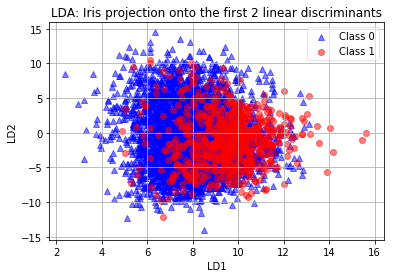

In [16]:
label_dict = {1: 'Class 1', 0: 'Class 0'}

def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(0,2),('^', 'o'),('blue', 'red')):


        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )
     

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()